In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "zyQducS5EcZHkArKr71PVpUNR"
Consumer_Secret_Key = "cTgRhiFFI2MyC6tG5Ggu1piks9bRJc3hLWMLrioslg4PSr3waa"
Access_Token = "1456570231535509505-8rfuFD99BSSlUN0UFvcEojkLp4Ba5s"
Access_Token_Secret = "EHvo26m87feWSJn9d5b5yaedXEVnOHimFt4YtLaLV6RjY"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="@XLAxiata_Tbk", count = 1000, lang="en", tweet_mode="extended")
# Print the last 10 tweets
print("Show the 10 recent tweets :\n")
i=1
for tweet in posts[:10]:
  print(str(i)+') '+tweet.full_text + '\n')
  i = i+1

Show the 10 recent tweets :

1) Coba deh screenshot terus tulis di kolom reply apa yang kamu dapat, ya!

#JadiLebihBaik https://t.co/9j99Kb9vfg

2) Buat kamu yang belum daftar @XL_Prioritas , yuk daftar sekarang dan nikmati diskon hingga 50% agar kamu bisa #JadiLebihBaik

Info: https://t.co/rI0S9B72RZ https://t.co/twbP7VoeIc

3) 🚨GIVEAWAY!🚨

Ada smartphone buat kamu! Followers setia XL Axiata pasti bisa jawab 😁

Langsung ikutan dengan cara:
1. Follow @xlaxiata_tbk
2 Jawab pertanyaan di kolom reply sebanyak-banyaknya
3. Gunakan hashtag 
#JadiLebihBaik
4. Like &amp; Retweet untuk tanda kamu berpartisipasi https://t.co/VKPn3TWd78

4) @afifahn_31 Hi Kak @afifahn_31 

Mohon maaf atas ketidaknyamanan kamu dalam menggunakan akses internet kami di kotamu.

untuk pengecekan lebih lanjut,segera hubungi layanan resmi pelanggan XL/AXIS via Twitter @myXLCare via DM untuk mendapatkan solusi. 🙂

Terima kasih

5) @vionaanandap Hi Kak @vionaanandap 
 
Mohon maaf atas ketidaknyamanan kamu dalam mengguna

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 15 rows of data
df.head()

,Tweets
0,Coba deh screenshot terus tulis di kolom reply...
1,"Buat kamu yang belum daftar @XL_Prioritas , yu..."
2,🚨GIVEAWAY!🚨\n\nAda smartphone buat kamu! Follo...
3,@afifahn_31 Hi Kak @afifahn_31 \n\nMohon maaf ...
4,@vionaanandap Hi Kak @vionaanandap \n \nMohon ...


In [ ]:
def cleanTxt(text):
   text = re.sub('@[A-Za-z0-9]+', '', text) #Removing @mentions
   text = re.sub('@', '', text)
   text = re.sub('RT[\s]+','', text)
   text = re.sub('https?:\/\/\S+', text)

   return text
   
   #Clean the Tweets
   df['Tweets'] = df['Tweets'].apply(cleanTxt)

   # Show the cleaned tweets
   df

In [ ]:
# create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create two new columns 'subjectivity  & polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show new dataframe
df

,Tweets,Subjectivity,Polarity
0,Coba deh screenshot terus tulis di kolom reply...,0.000000,0.0
1,"Buat kamu yang belum daftar @XL_Prioritas , yu...",0.000000,0.0
2,🚨GIVEAWAY!🚨\n\nAda smartphone buat kamu! Follo...,0.000000,0.0
3,@afifahn_31 Hi Kak @afifahn_31 \n\nMohon maaf ...,0.000000,0.0
4,@vionaanandap Hi Kak @vionaanandap \n \nMohon ...,0.383333,0.1
...,...,...,...
195,"Makanya, untuk mengawali keseriusan bisnis di ...",0.000000,0.0
196,"@liasstt Hihihi, tetap sabar jika seperti ini ...",0.000000,0.0
197,@shycmelinia Hi Kak @shycmelinia \n\nMohon maa...,0.383333,0.1
198,"@dabluedy Hi Kak @dabluedy ,\n\nMohon maaf ata...",0.383333,0.1


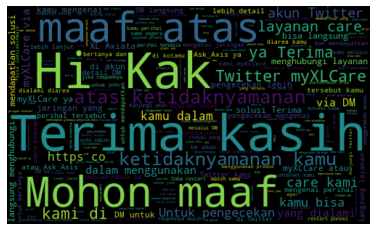

In [ ]:
# word cloud visualization
allWords = ' ' .join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
 # Show the data frame
df  

,Tweets,Subjectivity,Polarity,Analysis
0,Coba deh screenshot terus tulis di kolom reply...,0.000000,0.0,Neutral
1,"Buat kamu yang belum daftar @XL_Prioritas , yu...",0.000000,0.0,Neutral
2,🚨GIVEAWAY!🚨\n\nAda smartphone buat kamu! Follo...,0.000000,0.0,Neutral
3,@afifahn_31 Hi Kak @afifahn_31 \n\nMohon maaf ...,0.000000,0.0,Neutral
4,@vionaanandap Hi Kak @vionaanandap \n \nMohon ...,0.383333,0.1,Positive
...,...,...,...,...
195,"Makanya, untuk mengawali keseriusan bisnis di ...",0.000000,0.0,Neutral
196,"@liasstt Hihihi, tetap sabar jika seperti ini ...",0.000000,0.0,Neutral
197,@shycmelinia Hi Kak @shycmelinia \n\nMohon maa...,0.383333,0.1,Positive
198,"@dabluedy Hi Kak @dabluedy ,\n\nMohon maaf ata...",0.383333,0.1,Positive


In [ ]:
print('negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

negative tweets:

1) Laporan Global Gender Gap Index di 2020 menyebutkan bahwa masih ditemukan adanya kesenjangan gender dalam sektor lapangan kerja di Indonesia. Sedih banget ya :(

Maka dari itu, kesetaraan Gender menjadi kebijakan dan agenda dari XL Axiata.

2) @Muhammad180589 Hi kak Ade

Untuk XL center jawa timur berada di alamat
Ruko Suncity Block A1-A3 Kartoharjo Madiun Jawa Timur.Untuk informasi XL center lainnya dan jam oprasionalnya kamu bisa cek di link berikut https://t.co/HOyFDeOmwi Jika ada pertanyaan km langsung DM ke akun Twitter @myXLCare

3) @Ilham235829 @AXISgsm Pastinya dong kak, apalagi kalau main game pakai kartu Xl jadi makin lancar main gamenya

4) @wan_3s @AXISgsm Hi kak biasanya kalau kamu main game sendiri atau bareng temen kamu? Share ya pengalaman kamu disini

5) @Melanesia96 @AXISgsm Hi kak biasanya kalau kamu main game sendiri atau bareng temen kamu? Share ya pengalaman kamu disini

6) @Nanda57957711 @AXISgsm Hi kak share pengalaman kamu dong ketika main 

In [ ]:
print('positive tweet:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

positive tweet:

1) @vionaanandap Hi Kak @vionaanandap 
 
Mohon maaf atas ketidaknyamanan kamu dalam menggunakan akses internet kami di kotamu.

Coba restart ponsel lalu bantu clear cache, jika responnya masih sama,segera hubungi via Twitter 
@myXLCare via DM untuk mendapatkan solusi. 🙂

Terima kasih

2) @duskinthesky_ Hi Kak Duskinthesky_

Mohon maaf atas ketidaknyamanan kamu mengenai jaringan yang dialami diarea kamu.
Untuk pengecekan mengenai perihal tersebut, kamu bisa langsung menghubungi layanan e-care kami di Twitter @myXLCare dan Live Chat di https://t.co/A8r9nLMIti ya :)

Terima kasih

3) @DelimaNababan_ Hi Kak DelimaNababan_

Mohon maaf atas ketidaknyamanan kamu mengenai jaringan yang dialami diarea kamu.
Untuk pengecekan mengenai perihal tersebut, kamu bisa langsung menghubungi layanan e-care kami di Twitter @myXLCare atau @Ask_Axis ya :)

Terima kasih

4) @kopuchai Hi Kak Puchai

Mohon maaf atas ketidaknyamanan kamu mengenai jaringan yang dialami diarea kamu.
Untuk pengecek

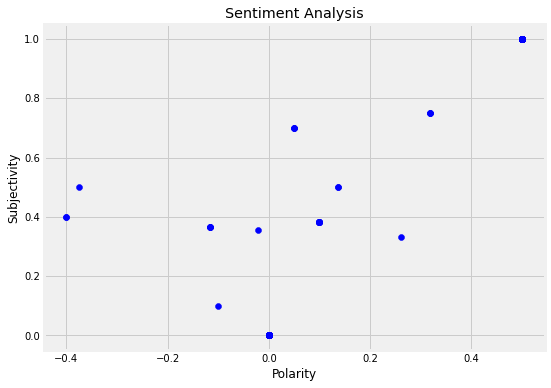

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round((ptweets.shape[0] / df.shape[0]) * 100 , 1)

41.5

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round((ntweets.shape[0] / df.shape[0]) * 100 , 1)

4.5

In [ ]:
df['Analysis'].value_counts()

Neutral     108
Positive     83
Negative      9
Name: Analysis, dtype: int64

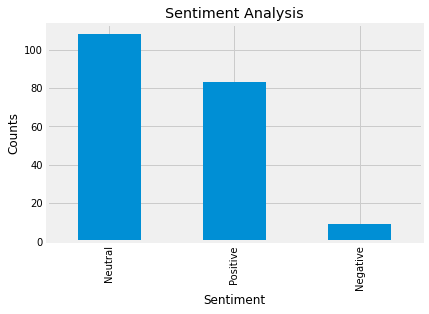

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind= 'bar')
plt.show()

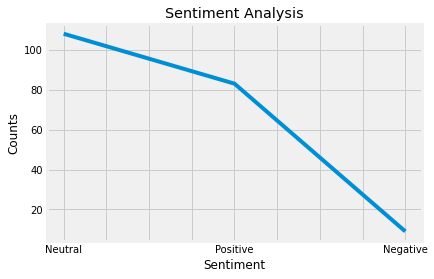

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind= 'line')
plt.show()